In [17]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


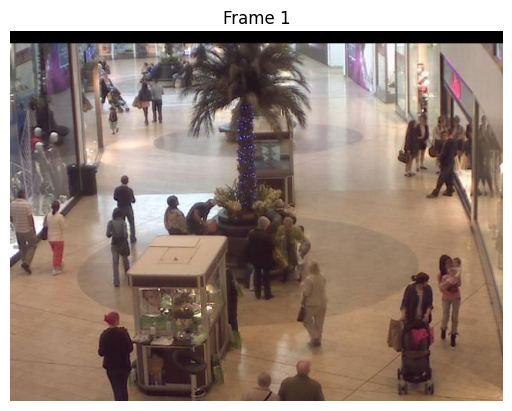

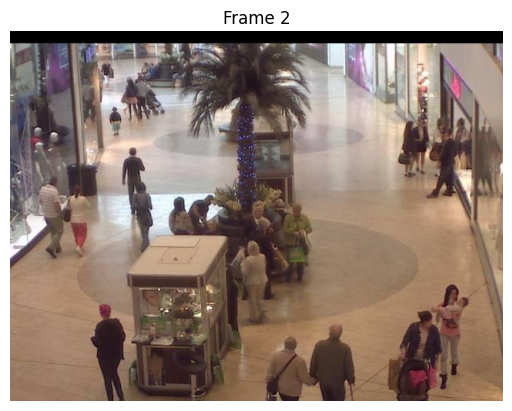

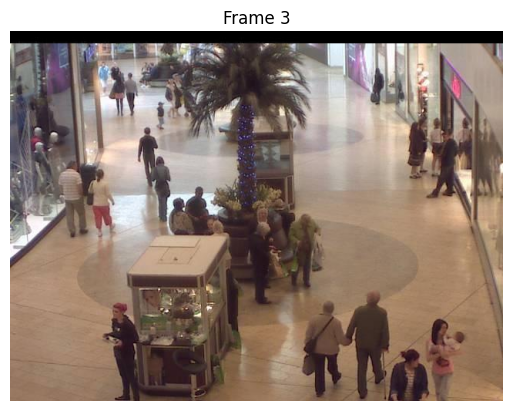

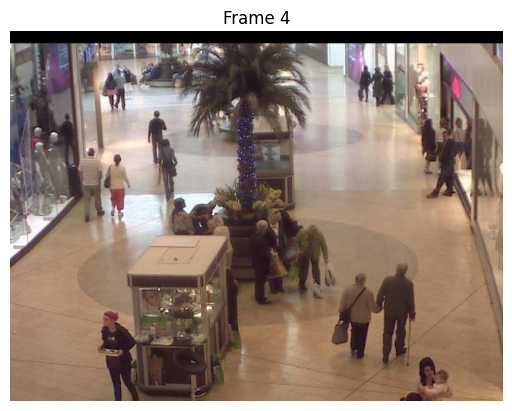

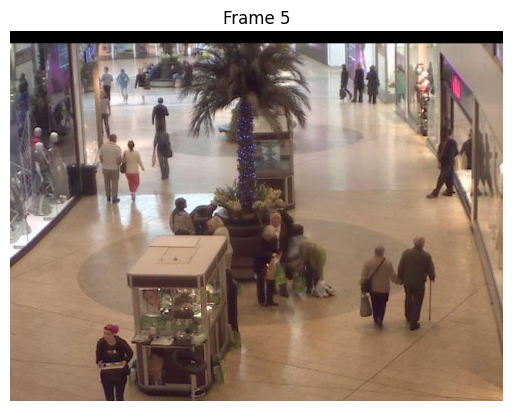

In [10]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the frames directory
frames_dir = 'mall_dataset/frames'  # Replace with your actual path

# Get a list of all frames (JPEG files)
frame_files = [f for f in os.listdir(frames_dir) if f.endswith('.jpg')]

# Sort the frame files to ensure they're in order
frame_files.sort()

# Function to load and display a specific frame
def load_and_display_frame(frame_number):
    frame_path = os.path.join(frames_dir, frame_files[frame_number])
    frame = cv2.imread(frame_path)
    
    # Convert BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame)
    plt.axis('off')  # Hide axis
    plt.title(f'Frame {frame_number + 1}')
    plt.show()

# Load and display the first 5 frames
for i in range(min(5, len(frame_files))):
    load_and_display_frame(i)


In [15]:
import numpy as np
import scipy.io

# Path to the ground truth MAT file
gt_file = 'mall_dataset/mall_gt.mat'  # Replace with your actual path

# Load ground truth data
gt_data = scipy.io.loadmat(gt_file)

# Access the frame and count data
frames_data = gt_data['frame']
counts_data = gt_data['count']

# Print the shape of the frames and counts data
print(f"Frames Data Shape: {frames_data.shape}")
print(f"Counts Data Shape: {counts_data.shape}")

# Loop through the frames to extract head positions and counts
frame_annotations = {}

for frame_idx in range(frames_data.shape[1]):
    frame = frames_data[0, frame_idx]  # Access each frame
    locs = frame['loc'][0, 0]  # Get the head positions
    count = counts_data[frame_idx, 0]  # Access the count correctly
    frame_annotations[frame_idx] = {
        'head_positions': locs,
        'count': count
    }

# Print the count of people and head positions in the first five frames
for i in range(min(5, len(frame_annotations))):
    head_positions = frame_annotations[i]['head_positions']
    count = frame_annotations[i]['count']
    print(f'Frame {i + 1} Count of people: {count}')
    print(f'Frame {i + 1} Head Positions: {head_positions}')


Frames Data Shape: (1, 2000)
Counts Data Shape: (2000, 1)
Frame 1 Count of people: 29
Frame 1 Head Positions: [[126.77986348  60.70477816]
 [116.95051195  47.59897611]
 [175.10750853  44.3225256 ]
 [184.11774744  45.14163823]
 [192.30887372  44.3225256 ]
 [230.80716724  42.68430034]
 [190.67064846  66.43856655]
 [176.74573379  70.53412969]
 [134.97098976 100.0221843 ]
 [ 14.56143345 215.51706485]
 [ 57.1552901  229.44197952]
 [148.07679181 193.40102389]
 [143.16211604 236.81399317]
 [210.32935154 222.8890785 ]
 [260.29522184 221.25085324]
 [348.75938567 225.34641638]
 [364.3225256  253.19624573]
 [331.55802048 249.10068259]
 [136.60921502 370.32935154]
 [330.73890785 453.87883959]
 [387.25767918 433.40102389]
 [397.08703072 315.44880546]
 [531.42150171 324.45904437]
 [563.3668942  299.88566553]
 [581.38737201 300.70477816]
 [566.64334471 140.15870307]
 [524.04948805 122.13822526]
 [536.33617747 117.22354949]
 [560.90955631 118.86177474]]
Frame 2 Count of people: 30
Frame 2 Head Positio

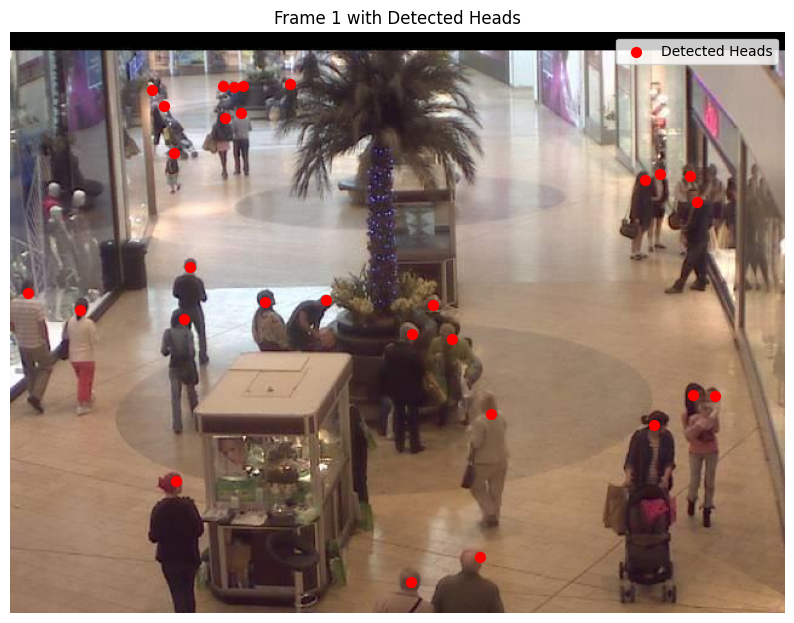

In [19]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the frames folder
frames_folder = 'mall_dataset/frames/'  # Update with your actual frames folder path

# Load the first frame
frame_index = 0  # Change this index to visualize other frames
frame_filename = f'{frames_folder}seq_{frame_index + 1:06d}.jpg'  # Adjusting to match your naming format
frame_image = cv2.imread(frame_filename)

# Check if the image was loaded successfully
if frame_image is None:
    print(f"Error: Could not load image at path: {frame_filename}")
else:
    # Convert the BGR image to RGB
    frame_image_rgb = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

    # Get the head positions for the first frame
    head_positions = frame_annotations[frame_index]['head_positions']

    # Plot the image and overlay head positions
    plt.figure(figsize=(10, 8))
    plt.imshow(frame_image_rgb)
    plt.scatter(head_positions[:, 0], head_positions[:, 1], color='red', s=50, label='Detected Heads')
    plt.title(f'Frame {frame_index + 1} with Detected Heads')
    plt.axis('off')
    plt.legend()
    plt.show()


Average Count of Pedestrians: 31.1575


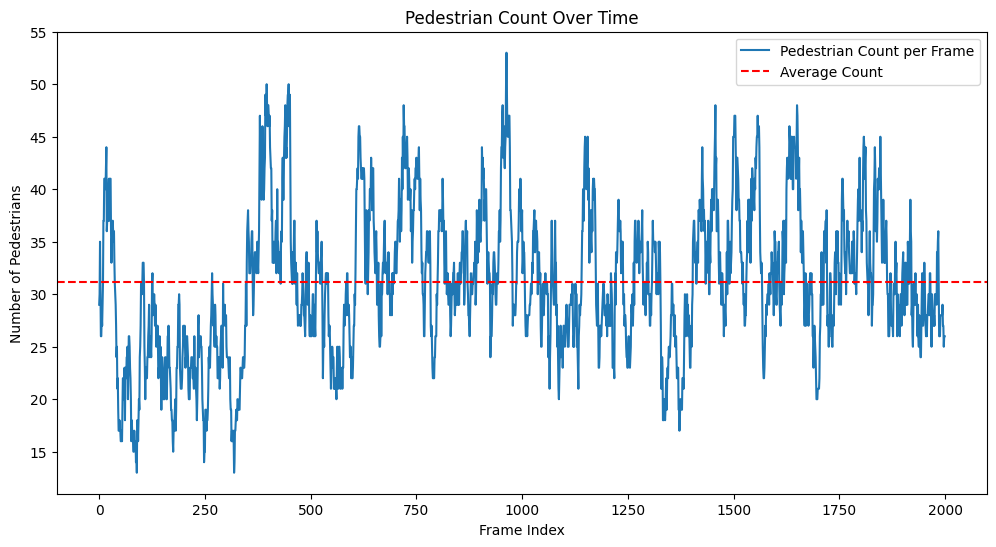

In [20]:
import matplotlib.pyplot as plt

# Extract counts for all frames
counts = [frame_annotations[i]['count'] for i in range(len(frame_annotations))]

# Calculate average count
average_count = np.mean(counts)
print(f"Average Count of Pedestrians: {average_count}")

# Plot counts over time
plt.figure(figsize=(12, 6))
plt.plot(counts, label='Pedestrian Count per Frame')
plt.axhline(y=average_count, color='r', linestyle='--', label='Average Count')
plt.title('Pedestrian Count Over Time')
plt.xlabel('Frame Index')
plt.ylabel('Number of Pedestrians')
plt.legend()
plt.show()


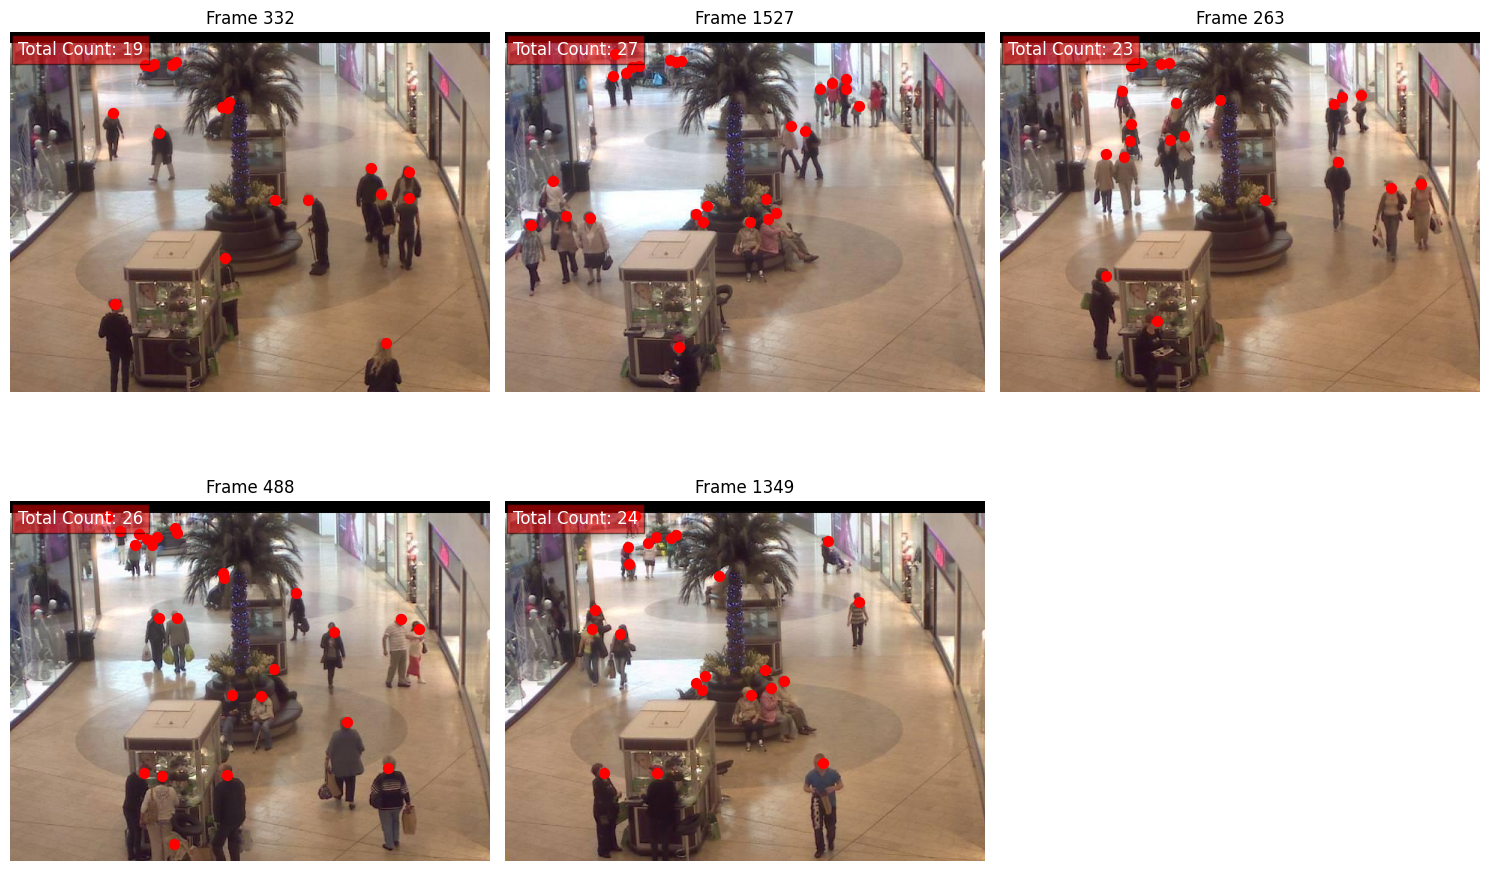

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Path to the frames folder
frames_folder = 'mall_dataset/frames/'  # Ensure this path is correct

# Shuffle frame indices and select the first 5
num_frames = len(frame_annotations)
shuffled_indices = random.sample(range(num_frames), 5)

# Plot each selected frame with head positions and count
plt.figure(figsize=(15, 10))

for i, frame_index in enumerate(shuffled_indices):
    # Load the frame
    frame_filename = f'{frames_folder}seq_{frame_index + 1:06d}.jpg'
    frame_image = cv2.imread(frame_filename)
    
    if frame_image is not None:
        # Convert the BGR image to RGB
        frame_image_rgb = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Get the head positions and count for the current frame
        head_positions = frame_annotations[frame_index]['head_positions']
        count = frame_annotations[frame_index]['count']  # Extract count directly

        # Create a subplot for each frame
        plt.subplot(2, 3, i + 1)
        plt.imshow(frame_image_rgb)
        plt.scatter(head_positions[:, 0], head_positions[:, 1], color='red', s=50, label='Detected Heads')
        
        # Display total count on the image
        plt.text(10, 30, f'Total Count: {count}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
        plt.title(f'Frame {frame_index + 1}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
import os
import numpy as np
import scipy.io

# Load the ground truth data
gt_file = 'mall_dataset/mall_gt.mat'  # Replace with your actual path
gt_data = scipy.io.loadmat(gt_file)

# Access the frames and counts data
frames_data = gt_data['frame']
counts_data = gt_data['count'].flatten()  # Flatten the counts array to make it 1D

# Directory to save annotations
annotations_dir = 'mall_dataset/yolo_annotations'
os.makedirs(annotations_dir, exist_ok=True)

# Convert head positions to YOLO format
for frame_idx in range(frames_data.shape[1]):
    # Get the annotations for the current frame
    annotations = frames_data[0, frame_idx]
    locs = annotations['loc'][0, 0]  # Extract head positions
    
    # Get count for the current frame
    count = counts_data[frame_idx]  # Access the count directly

    # Create a corresponding annotation file
    with open(os.path.join(annotations_dir, f'seq_{frame_idx + 1:06d}.txt'), 'w') as f:
        for pos in locs:
            x_center = pos[0] / 640  # Normalize by image width
            y_center = pos[1] / 480  # Normalize by image height
            width = 0.05  # Set a fixed width for the bounding box (example value)
            height = 0.05  # Set a fixed height for the bounding box (example value)
            f.write(f'0 {x_center} {y_center} {width} {height}\n')  # Assuming class_id is 0 for pedestrian

            
    # Debug print for verification
    print(f"Frame {frame_idx + 1}: Count of people: {count}, Annotations saved.")


Frame 1: Count of people: 29, Annotations saved.
Frame 2: Count of people: 30, Annotations saved.
Frame 3: Count of people: 35, Annotations saved.
Frame 4: Count of people: 31, Annotations saved.
Frame 5: Count of people: 26, Annotations saved.
Frame 6: Count of people: 26, Annotations saved.
Frame 7: Count of people: 28, Annotations saved.
Frame 8: Count of people: 27, Annotations saved.
Frame 9: Count of people: 29, Annotations saved.
Frame 10: Count of people: 31, Annotations saved.
Frame 11: Count of people: 37, Annotations saved.
Frame 12: Count of people: 37, Annotations saved.
Frame 13: Count of people: 41, Annotations saved.
Frame 14: Count of people: 41, Annotations saved.
Frame 15: Count of people: 41, Annotations saved.
Frame 16: Count of people: 40, Annotations saved.
Frame 17: Count of people: 42, Annotations saved.
Frame 18: Count of people: 44, Annotations saved.
Frame 19: Count of people: 36, Annotations saved.
Frame 20: Count of people: 37, Annotations saved.
Frame 21:

In [6]:
import os
import shutil
import random

# Paths
dataset_dir = 'mall_dataset/frames'  # Replace with your dataset path
annotations_dir = 'mall_dataset/yolo_annotations'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Create directories for train and val sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get list of image files
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]
random.shuffle(image_files)  # Shuffle the images for random split

# Define split ratio
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

# Split images into train and validation
train_images = image_files[:split_index]
val_images = image_files[split_index:]

# Move images to their respective directories
for img in train_images:
    shutil.copy(os.path.join(dataset_dir, img), os.path.join(train_dir, img))
    # Copy corresponding annotation file
    annotation_file = img.replace('.jpg', '.txt')
    shutil.copy(os.path.join(annotations_dir, annotation_file), os.path.join(train_dir, annotation_file))

for img in val_images:
    shutil.copy(os.path.join(dataset_dir, img), os.path.join(val_dir, img))
    # Copy corresponding annotation file
    annotation_file = img.replace('.jpg', '.txt')
    shutil.copy(os.path.join(annotations_dir, annotation_file), os.path.join(val_dir, annotation_file))

print(f'Split complete: {len(train_images)} training images and {len(val_images)} validation images.')


Split complete: 1600 training images and 400 validation images.


In [42]:
# Check the type and contents of roi_mask
print("ROI Mask Type:", type(roi_mask))
print("ROI Mask Contents:", roi_mask)


ROI Mask Type: <class 'numpy.void'>
ROI Mask Contents: (array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),)


In [41]:
import matplotlib.pyplot as plt

# Define the number of frames to visualize
num_frames_to_display = 5

for i in range(num_frames_to_display):
    # Load the current frame
    frame_path = f'mall_dataset/frames/seq_00000{i + 1}.jpg'
    frame = cv2.imread(frame_path)

    # Check if the image loaded successfully
    if frame is None:
        print(f"Error: Could not load image {frame_path}")
        continue

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Extract ROI mask
    roi_mask = roi_data['roi'][0][0]  # Get the mask
    roi_mask_resized = cv2.resize(roi_mask, (frame.shape[1], frame.shape[0]))  # Resize to frame size

    # Apply the mask to the frame
    roi_applied_frame = cv2.bitwise_and(frame_rgb, frame_rgb, mask=roi_mask_resized)

    # Get the head position for the current frame
    head_position = flat_head_positions_array[i]  # Retrieve head position
    if isinstance(head_position, (float, int)):
        plt.scatter(head_position, i * 20, color='red', label='Head Position')  # Plot head position

    # Display the frame with ROI
    plt.imshow(roi_applied_frame)
    plt.title(f'Frame {i + 1} with ROI and Head Position')
    plt.axis('off')
    plt.legend()
    plt.show()


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [35]:
# Load perspective ROI points
roi_data = sio.loadmat(roi_path)
print("Keys in ROI Data:", roi_data.keys())
roi_info = roi_data['roi']
roi_points = roi_info[0][0] if roi_info.ndim > 0 else None
if roi_points is not None:
    print("ROI Points Shape:", roi_points.shape)

Keys in ROI Data: dict_keys(['__header__', '__version__', '__globals__', 'roi', 'pMapN'])
ROI Points Shape: ()


In [22]:
import os
import cv2
import numpy as np
import scipy.io as sio

def normalize_image(frame, src_pts, width, height):
    # Define destination points for the perspective transform
    dst_pts = np.float32([[0, 0], [width, 0], [0, height], [width, height]])  # Warping to a rectangle

    # Compute the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

    # Apply the perspective transformation
    normalized_frame = cv2.warpPerspective(frame, matrix, (width, height))

    return normalized_frame

def process_all_frames(frames_path, annotations, output_path):
    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Iterate through all the images in the specified frames directory
    for frame_index in range(len(annotations['frame'][0])):
        frame_filename = f'seq_00000{frame_index + 1}.jpg'  # Adjust this filename pattern based on your naming convention
        frame_path = os.path.join(frames_path, frame_filename)
        frame = cv2.imread(frame_path)

        # Check if the image loaded successfully
        if frame is None:
            print(f"Error: Could not load image {frame_path}")
            continue
        
        # Extract the source points from annotations for this frame
        frame_annotations = annotations['frame'][0, frame_index][0]  # Extract annotations for the current frame
        coordinates = frame_annotations['loc'][0][0]  # Get coordinates from annotations
        
        # Example: Assuming you need the first four coordinates for normalization
        if coordinates.shape[0] >= 4:
            src_pts = np.float32(coordinates[:4])  # Use the first four points (adjust based on your needs)
        else:
            print(f"Not enough coordinates found for frame {frame_index}. Skipping normalization.")
            continue

        # Normalize the image
        normalized_frame = normalize_image(frame, src_pts, 640, 480)  # Set your desired output size

        # Save the normalized image to the output directory
        normalized_frame_path = os.path.join(output_path, frame_filename)
        cv2.imwrite(normalized_frame_path, normalized_frame)

        print(f"Processed and saved normalized image: {normalized_frame_path}")

# Define paths
frames_path = 'mall_dataset/frames/'  # Path to the folder containing original frames
annotations_path = 'mall_dataset/mall_gt.mat'  # Path to your annotation file
output_path = 'mall_dataset/normalized_frames/'  # Path to save normalized frames

# Load the ground truth annotations from the .mat file
annotations = sio.loadmat(annotations_path)

# Process all frames
process_all_frames(frames_path, annotations, output_path)


Not enough coordinates found for frame 0. Skipping normalization.
Not enough coordinates found for frame 1. Skipping normalization.
Not enough coordinates found for frame 2. Skipping normalization.
Not enough coordinates found for frame 3. Skipping normalization.
Not enough coordinates found for frame 4. Skipping normalization.
Not enough coordinates found for frame 5. Skipping normalization.
Not enough coordinates found for frame 6. Skipping normalization.
Not enough coordinates found for frame 7. Skipping normalization.
Not enough coordinates found for frame 8. Skipping normalization.
Error: Could not load image mall_dataset/frames/seq_0000010.jpg
Error: Could not load image mall_dataset/frames/seq_0000011.jpg
Error: Could not load image mall_dataset/frames/seq_0000012.jpg
Error: Could not load image mall_dataset/frames/seq_0000013.jpg
Error: Could not load image mall_dataset/frames/seq_0000014.jpg
Error: Could not load image mall_dataset/frames/seq_0000015.jpg
Error: Could not load 

In [23]:
# Load the ground truth annotations from the .mat file
annotations = sio.loadmat(annotations_path)

# Check the keys and data structure in the annotations
print(annotations.keys())
print(annotations['frame'])


dict_keys(['__header__', '__version__', '__globals__', 'frame', 'count'])
[[array([[(array([[126.77986348,  60.70477816],
                 [116.95051195,  47.59897611],
                 [175.10750853,  44.3225256 ],
                 [184.11774744,  45.14163823],
                 [192.30887372,  44.3225256 ],
                 [230.80716724,  42.68430034],
                 [190.67064846,  66.43856655],
                 [176.74573379,  70.53412969],
                 [134.97098976, 100.0221843 ],
                 [ 14.56143345, 215.51706485],
                 [ 57.1552901 , 229.44197952],
                 [148.07679181, 193.40102389],
                 [143.16211604, 236.81399317],
                 [210.32935154, 222.8890785 ],
                 [260.29522184, 221.25085324],
                 [348.75938567, 225.34641638],
                 [364.3225256 , 253.19624573],
                 [331.55802048, 249.10068259],
                 [136.60921502, 370.32935154],
                 [330.73890785, 

In [2]:
import torch

# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/FARAZ/Desktop/Projects/Computer-Vision/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\FARAZ/.cache\torch\hub\master.zip
YOLOv5  2024-11-5 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os
import cv2

# Start video capture
video_path = "C:/Users/FARAZ/Desktop/Projects/Computer-Vision/VID-20220311-WA0009.mp4"  # Update this path
if not os.path.exists(video_path):
    print("Video file does not exist at the specified path.")
else:
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Inference
        results = model(frame)
        detections = results.xyxy[0]

        # Process detections
        for *box, conf, cls in detections:
            if cls == 0:  # Pedestrian class
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, f'Pedestrian: {conf:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        cv2.imshow('Real-Time Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the trained YOLOv5 model
model_path = 'C:/Users/FARAZ/Desktop/Projects/Computer-Vision/yolov5/runs/train/exp/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# Start video capture
video_path = "C:/Users/FARAZ/Desktop/Projects/Computer-Vision/vid.mp4"  # Update this path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Inference
        results = model(frame)
        detections = results.xyxy[0]

        # Process detections
        for *box, conf, cls in detections:
            if cls == 0:  # Pedestrian class
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, f'Pedestrian: {conf:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Convert the frame to RGB and show it with Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.axis('off')  # Hide axes
        plt.show()
        
        # Pause to mimic a frame rate
        plt.pause(0.1)  # Adjust the pause duration as needed

    cap.release()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\FARAZ/.cache\torch\hub\master.zip
YOLOv5  2024-11-5 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cach

KeyboardInterrupt: 

In [ ]:
import torch
import cv2

# Load the trained YOLOv5 model
model_path = 'C:/Users/FARAZ/Desktop/Projects/Computer-Vision/yolov5/runs/train/exp/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# Start video capture from webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Inference
        results = model(frame)
        detections = results.xyxy[0]

        # Process detections
        for *box, conf, cls in detections:
            if cls == 0:  # Pedestrian class (assuming 0 corresponds to pedestrians)
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, f'Pedestrian: {conf:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display the resulting frame
        cv2.imshow('Real-Time Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Exit loop on 'q' key press
            break

    cap.release()  # Release the video capture object
    cv2.destroyAllWindows()  # Close all OpenCV windows


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\FARAZ/.cache\torch\hub\master.zip
YOLOv5  2024-11-5 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


KeyboardInterrupt: 

: 

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Inference
    results = model(frame)
    detections = results.xyxy[0]

    # Process detections
    for *box, conf, cls in detections:
        if cls == 0:  # Pedestrian class
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame, f'Pedestrian: {conf:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imshow('Real-Time Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
            
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\FARAZ/.cache\torch\hub\master.zip
YOLOv5  2024-11-5 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\FARAZ/.cach

KeyboardInterrupt: 

In [2]:
import cv2
import os

# Create a folder to save frames if it doesn't exist
output_folder = "extracted_frames"
os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture('runs/detect/predict/vid.avi')

# Read and save frames
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(f"{output_folder}/frame_{frame_count}.jpg", frame)  # Save frame as an image
    frame_count += 1

cap.release()
cv2.destroyAllWindows()


In [5]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.pt")  # build a new model from scratch

# Use the model
results = model.train(data="C:/Users/FARAZ/Desktop/Projects/Computer-Vision/data.yaml", epochs=5, batch=8)  # train the model

Ultralytics 8.3.27  Python-3.12.7 torch-2.2.2+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/FARAZ/Desktop/Projects/Computer-Vision/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning C:\Users\FARAZ\Desktop\Projects\Computer-Vision\mall_dataset\train.cache... 1910 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1910/1910 [00:00<?, ?it/s]
val: Scanning C:\Users\FARAZ\Desktop\Projects\Computer-Vision\mall_dataset\val.cache... 710 images, 0 backgrounds, 0 corrupt: 100%|██████████| 710/710 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train15
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.211      1.574      1.213        183        640: 100%|██████████| 239/239 [19:04<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [02:18<00:00,  3.09s/it]

                   all        710      22086      0.856      0.731      0.831      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.789      1.115      1.057        302        640: 100%|██████████| 239/239 [19:36<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [02:13<00:00,  2.97s/it]

                   all        710      22086      0.847      0.774      0.851      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.715      1.079      1.042        362        640: 100%|██████████| 239/239 [18:52<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [02:08<00:00,  2.86s/it]


                   all        710      22086      0.911      0.839      0.904      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.663      1.051      1.024        282        640: 100%|██████████| 239/239 [19:06<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [02:11<00:00,  2.92s/it]

                   all        710      22086      0.884      0.842      0.896      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.58      1.026      1.004        301        640: 100%|██████████| 239/239 [19:02<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [02:07<00:00,  2.84s/it]


                   all        710      22086       0.89      0.867      0.916       0.47

5 epochs completed in 1.782 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 6.2MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.2.2+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:41<00:00,  2.25s/it]


                   all        710      22086       0.89      0.866      0.916       0.47
Speed: 2.0ms preprocess, 118.9ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs\detect\train15


In [5]:
!python setup.py install

python: can't open file 'c:\\Users\\FARAZ\\Desktop\\Projects\\Computer-Vision\\setup.py': [Errno 2] No such file or directory


In [1]:
print("hello")

hello


In [4]:
from deep_sort.utils.parser import get_config
from deep_sort.deep_sort import DeepSort
from deep_sort.sort.tracker import Tracker

deep_sort_weights = 'deep_sort/deep/checkpoint/ckpt.t7'
tracker = DeepSort(model_path=deep_sort_weights, max_age=70)

ModuleNotFoundError: No module named 'easydict'